# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# **Data Validation**
These data set has 947 Rows, 6 columns. There were 52 rows with all Null values that were removed to not to affect the fitting and prediciton, left us with 895 Rows to use. All variables were validated, categorical data type were changed as following
- Recipe: Recipe ID or number, values from 1 to 947, no changes. it wasn't used for analysis
- Calories: Float data type, 52 Missing data Were deleted, Only 895 left. 
- CarboHydrates: Float data type, 52 Missing data Were deleted, Only 895 left. 
- Sugar: Float data type, 52 Missing data Were deleted, Only 895 left. 
- Protein: Float data type, 52 Missing data Were deleted, Only 895 left. 
- Category: Categorical Data type with 11 Categoris. 2 of them were merged into one category, left with 10 categories. No           missing values.
- servings: Numerical data type, Used as categories. 6 categories, was merged into 4 categories.
- high_traffic: Target variable with 2 values, Either High or NAN, it was changed to 1 for High and 0 for NaN.

In [34]:
#Importing needed libraries and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import yeojohnson
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [35]:
#Data Reading and exploring
file_path='recipe_site_traffic_2212.csv'
df=pd.read_csv(file_path)
print(df.info())
print(df['category'].value_counts())
print(df['servings'].value_counts())
print(df['high_traffic'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB
None
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64
4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: s

# Data Cleaning
As it appears in Category, there is Chicken and Chicken breast, it is better to change "Chicken Breast" into 'Chicken' and put them in one category, then change the column to category type.
In servings column,there are only 1 recipes with '6 as a snack', and 2 with '4 as a snack', so 'as a snack' could be removed as the servings are 6 and 4 respectivly, And although it is a category, it could be changed into numerical and use it as categorical column.
After Data cleaing, Checking for dublication and removing missing data.
it appears that all nulls apear in the same rows, which means there is 52 recipes with no info, so they should be deleted as they couldn't be used for analysis.

In [36]:
#Category feature type changing and validation
df['category']=df['category'].str.replace(' Breast','').astype('category')
print(df['category'].value_counts())

Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Dessert           83
Vegetable         83
Meat              79
One Dish Meal     71
Name: category, dtype: int64


In [37]:
#Serving feature Modification and validation
df['servings']=df['servings'].str.replace(' as a snack','').astype('int')
print(df['servings'].value_counts())

4    391
6    198
2    183
1    175
Name: servings, dtype: int64


In [38]:
#Target variable Modification and validation
df['high_traffic'] = np.where(df['high_traffic'] == "High", 1, 0)
print(df['high_traffic'].value_counts())

1    574
0    373
Name: high_traffic, dtype: int64


In [39]:
#Duplication checking, and null checking for data cleaning.
df.duplicated(subset='recipe').sum()

print(df.isnull().sum())
print(df[df.isnull().any(axis=1)])

recipe           0
calories        52
carbohydrate    52
sugar           52
protein         52
category         0
servings         0
high_traffic     0
dtype: int64
     recipe  calories  carbohydrate  ...       category  servings high_traffic
0         1       NaN           NaN  ...           Pork         6            1
23       24       NaN           NaN  ...           Meat         2            0
48       49       NaN           NaN  ...        Chicken         4            0
82       83       NaN           NaN  ...           Meat         4            1
89       90       NaN           NaN  ...           Pork         6            1
116     117       NaN           NaN  ...        Chicken         6            1
121     122       NaN           NaN  ...        Dessert         2            1
136     137       NaN           NaN  ...  One Dish Meal         2            1
149     150       NaN           NaN  ...         Potato         2            1
187     188       NaN           NaN  ...     

In [40]:
# Missing Data Removing
df=df.dropna().reset_index(drop=True).set_index('recipe')
print(df.describe())

numerical_columns =  df.select_dtypes(include='float').columns

num_rows = len(numerical_columns)

          calories  carbohydrate  ...    servings  high_traffic
count   895.000000    895.000000  ...  895.000000    895.000000
mean    435.939196     35.069676  ...    3.458101      0.597765
std     453.020997     43.949032  ...    1.735979      0.490623
min       0.140000      0.030000  ...    1.000000      0.000000
25%     110.430000      8.375000  ...    2.000000      0.000000
50%     288.550000     21.480000  ...    4.000000      1.000000
75%     597.650000     44.965000  ...    4.000000      1.000000
max    3633.160000    530.420000  ...    6.000000      1.000000

[8 rows x 6 columns]


# Exploratory Analysis 
I have investigated the target variable and features of the recipes, After the analysis,I decided to apply the following changes to enable modeling:
- ['calories', 'carbohydrate', 'sugar', 'protein']: Yaojohnson  Transformation should be done for the data to prevent bias.
- Category: Convert into Categorical data

# Corelation Analysis
From the pairplot we can notice that there is not significant corealtion between features, so we will proceed with our analysis to see the distribution of the data.

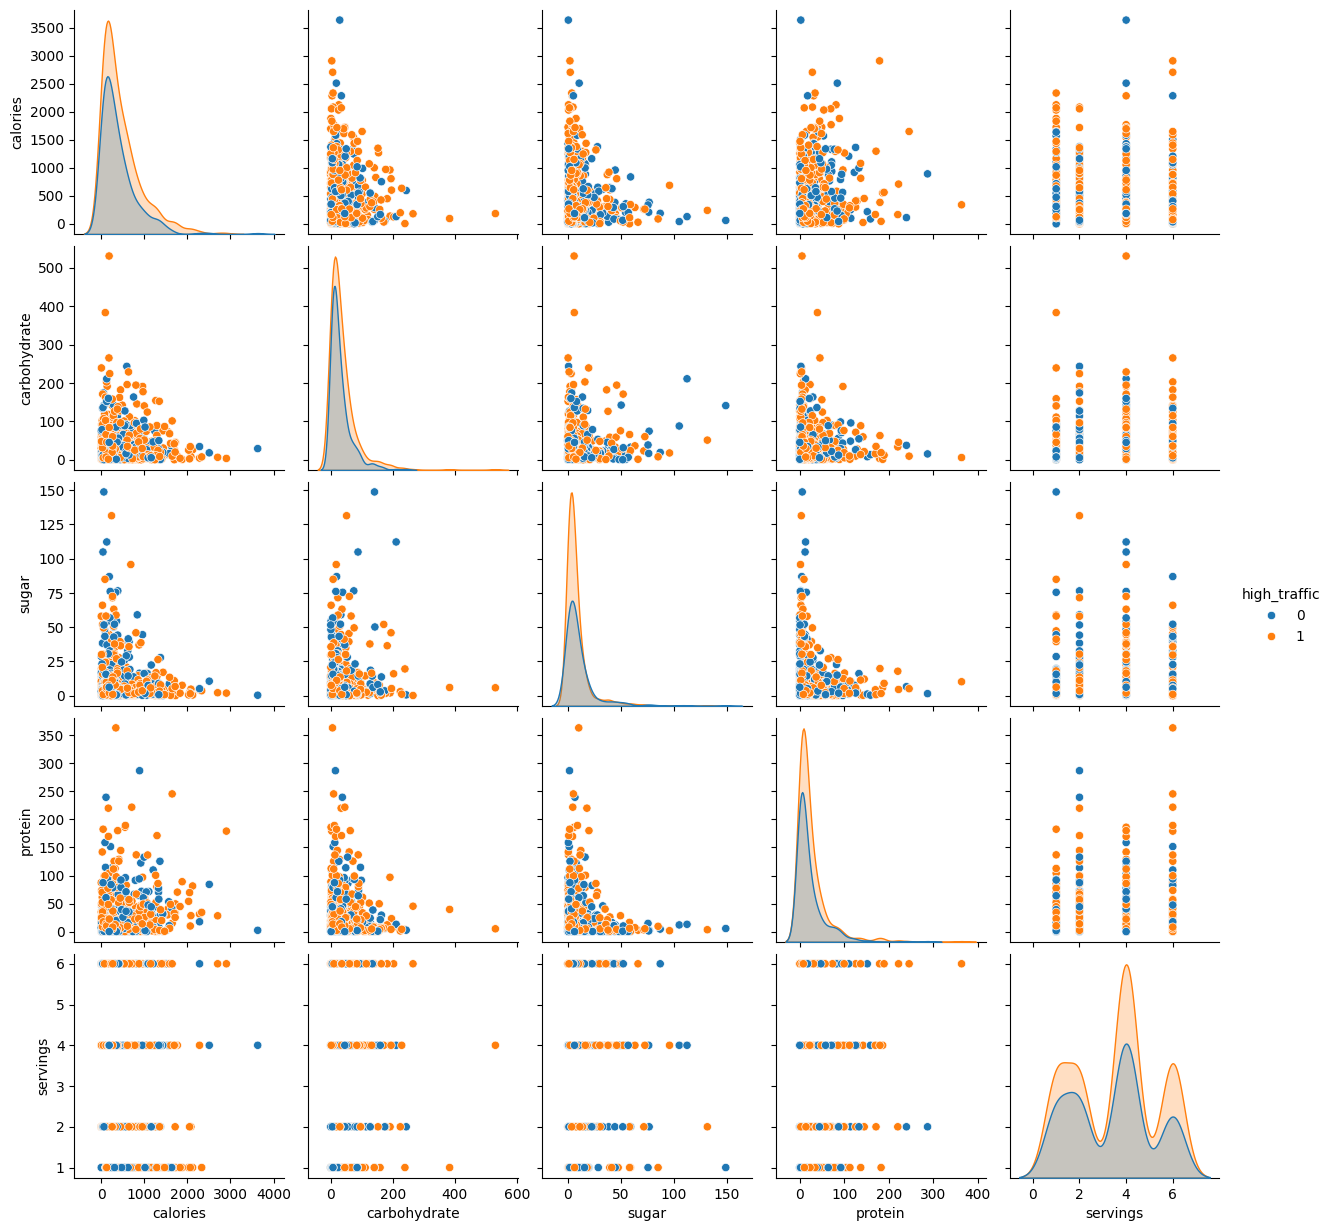

In [41]:
#filtering columns necessary for analysis.
filtered_columns = ['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings', 'high_traffic']

sns.pairplot(df[filtered_columns], hue='high_traffic')
plt.show()

# Visualisation of statstical Summary of Numerical Data
On looking at the describtion of each row, there is high standard deviation for Calories, carbohydrates, sugar and proteins, beside quantiles show outliers The distribution graphs ensures the skewness to right for all numerical Values Further visualization needed to show the outliers and distribution

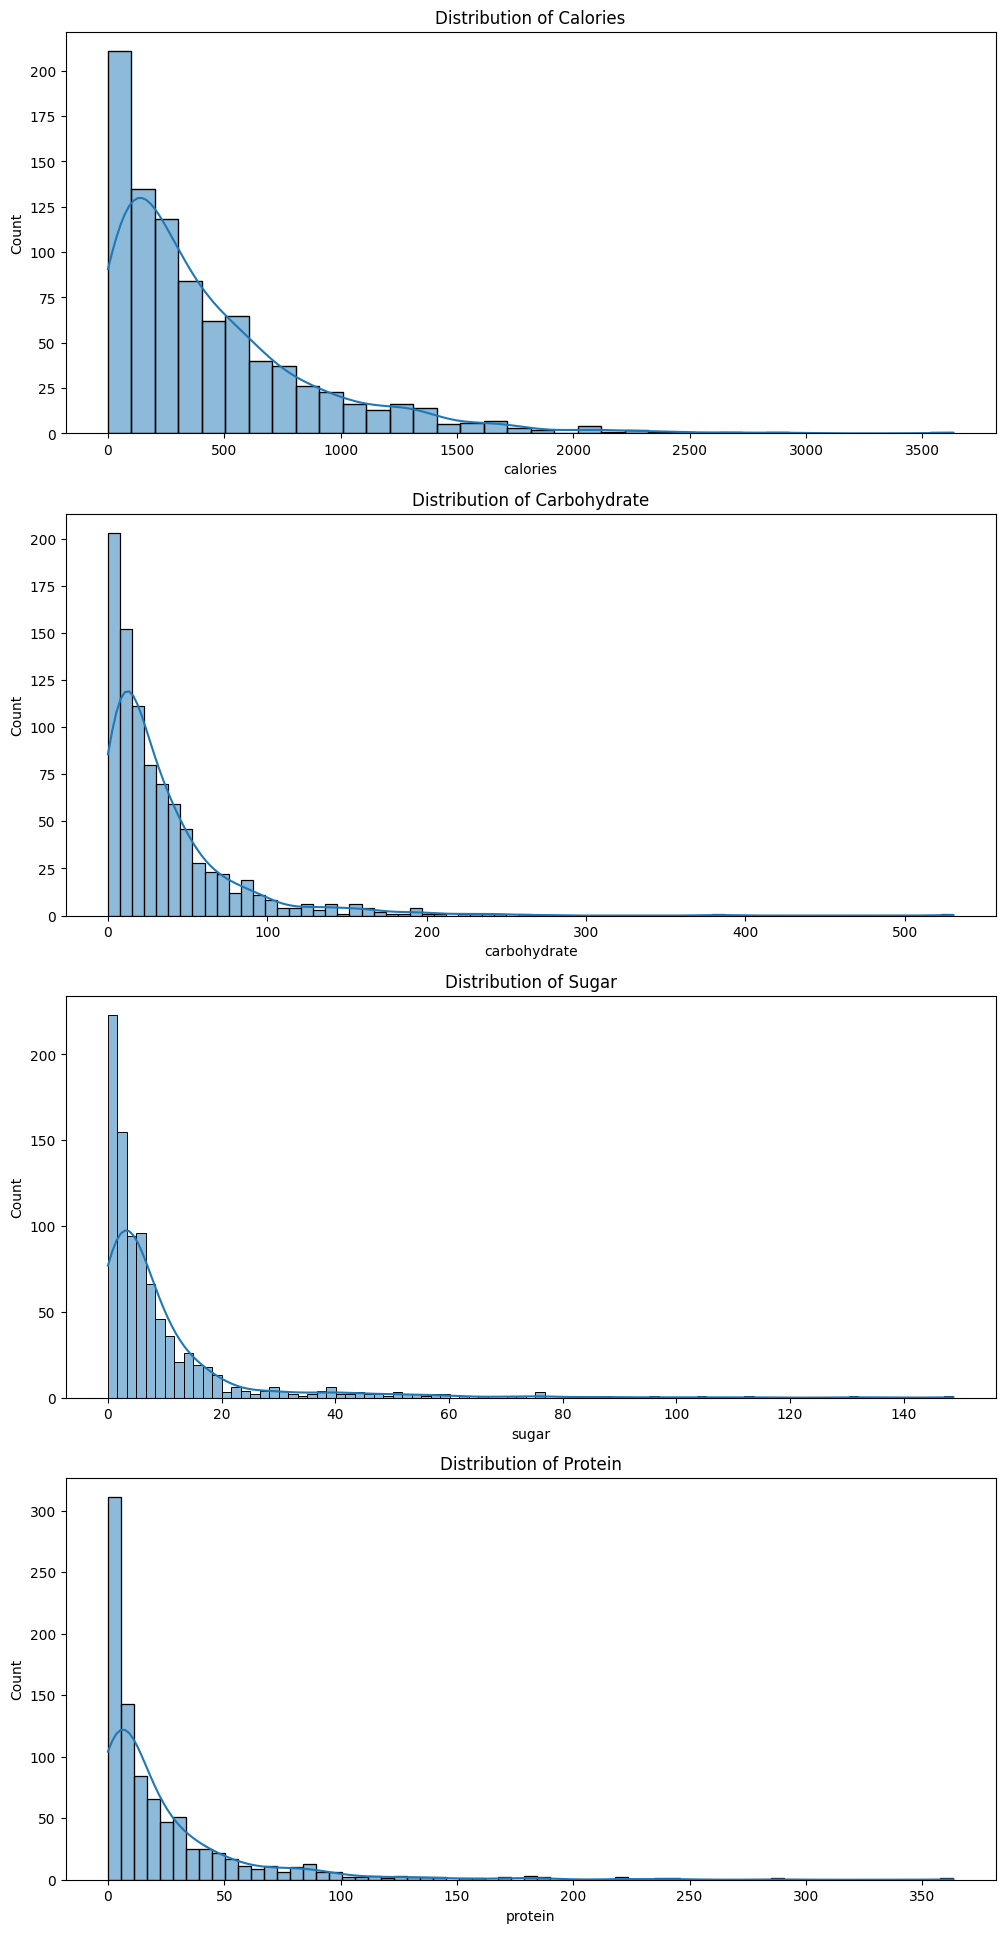

In [42]:
#Histogram Visualization for each feature to check distribution.

#Selecting only Numerical features
numerical_columns =  df.select_dtypes(include='float').columns

#creating subplots with the desired number of rows and columns
num_rows = len(numerical_columns)
fig, axes = plt.subplots(num_rows, 1, figsize=(12, 6 * num_rows))
#iterating over the numerical columns and plot the distributions

for i,column in enumerate(numerical_columns):
    ax = axes[i] if num_rows > 1 else axes
    sns.histplot(data=df, x=column, kde=True, ax=ax)
    ax.set_title(f"Distribution of {column.capitalize()}")

# Box Plots
Box Plots shows there is outliers, but asa their number is a bit high, and they are distributed along the values, further invistigation of the relation between values and Categorical data is need to see if they are true outliers or it they are depenendant values First, we need to invisitigate the relation between numerical values and category then with servings, as both of those two factors could affect nutriational values. Also, using median will be more appropriate for analysis due to presence of outliers.

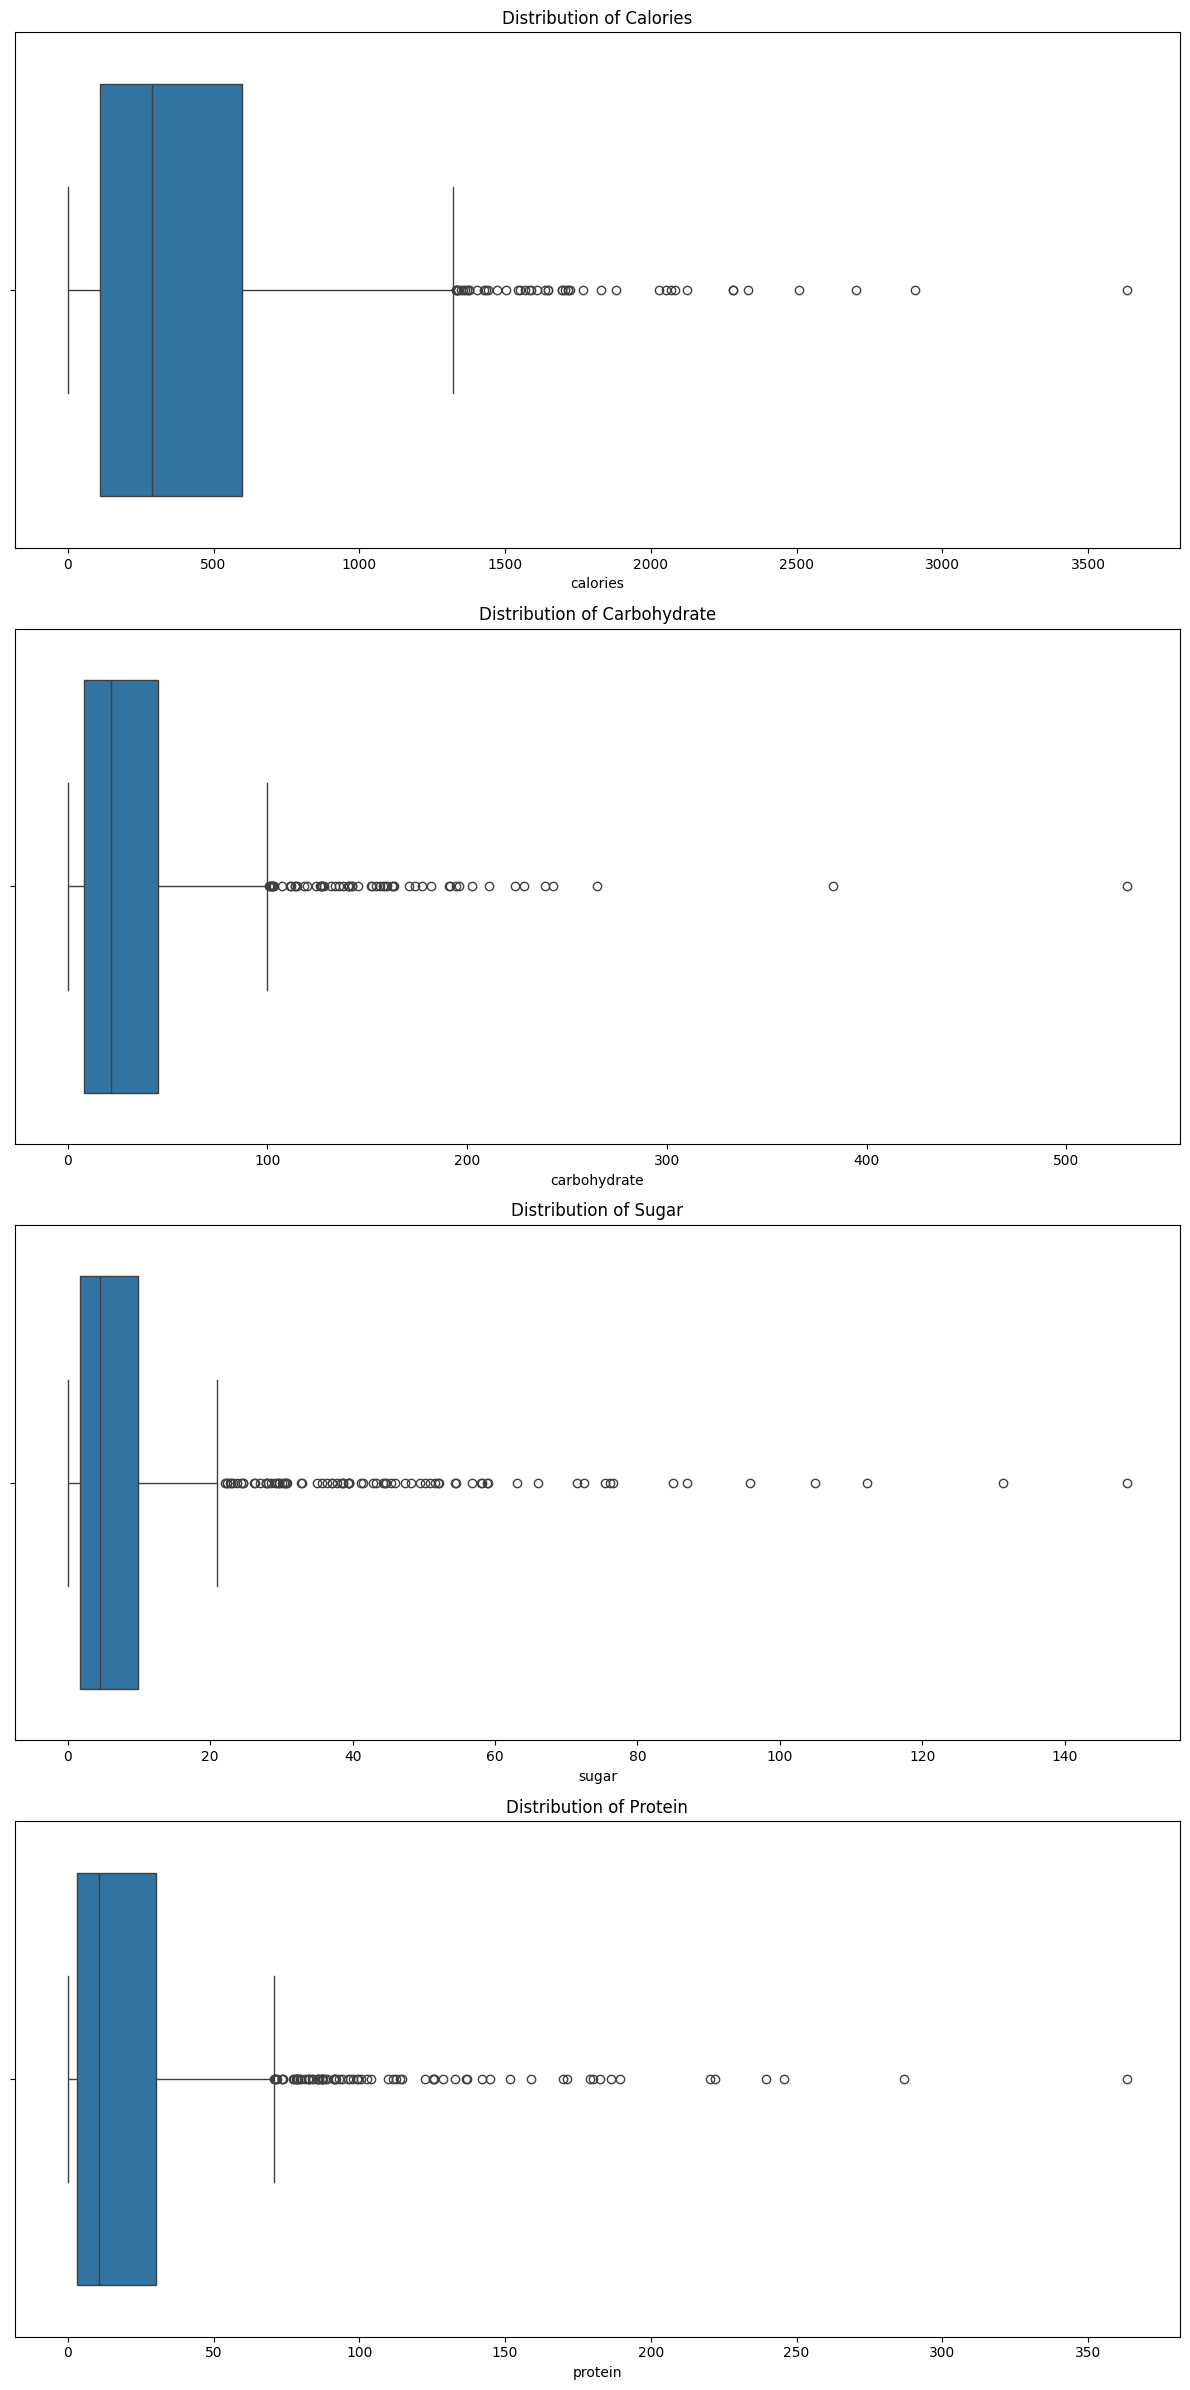

In [43]:
#BoxPlot to check for outliers distribution

#Selecting only Numerical features
numerical_columns =  df.select_dtypes(include='float').columns

#creating subplots with the desired number of rows and columns
num_rows = len(numerical_columns)
fig, axes = plt.subplots(num_rows, 1, figsize=(12, 6 * num_rows))

#iterating over the numerical columns and plot the distributions

for i, column in enumerate(numerical_columns):
    ax = axes[i] if num_rows > 1 else axes
    sns.boxplot(data=df, x=column, ax=ax)
    ax.set_title(f"Distribution of {column.capitalize()}")
plt.tight_layout()
plt.show()


The graphs showed that the median values of nutrtional values is not equally distributed across the categories, which means deleting the outliers could affect the data,  but the median didn't show big difference accross servings. 

Both Percent Matrix and Countplot of category against high traffic showed that Vegetables, potato and Pork havevery high traffic rate with percentage over 90%, with beverages has very low traffic, witn only 5% high traffic rat.

<Figure size 640x480 with 0 Axes>

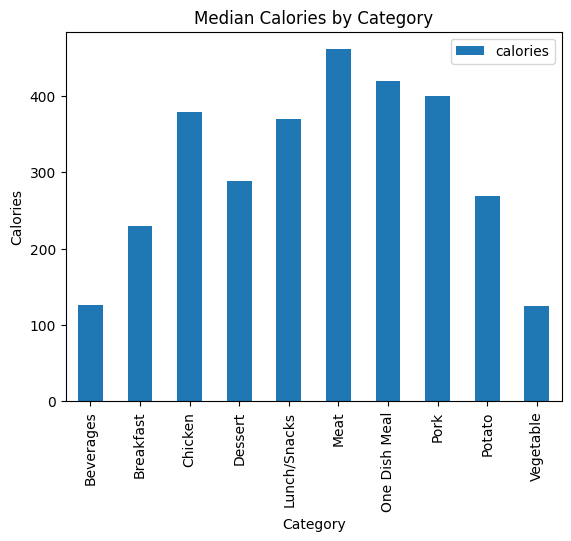

<Figure size 640x480 with 0 Axes>

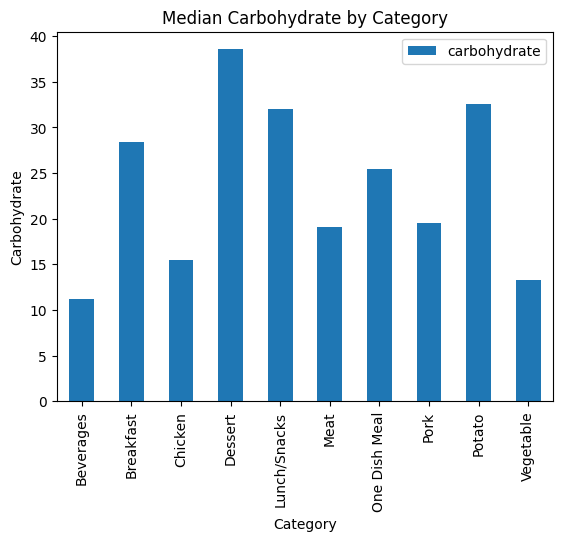

<Figure size 640x480 with 0 Axes>

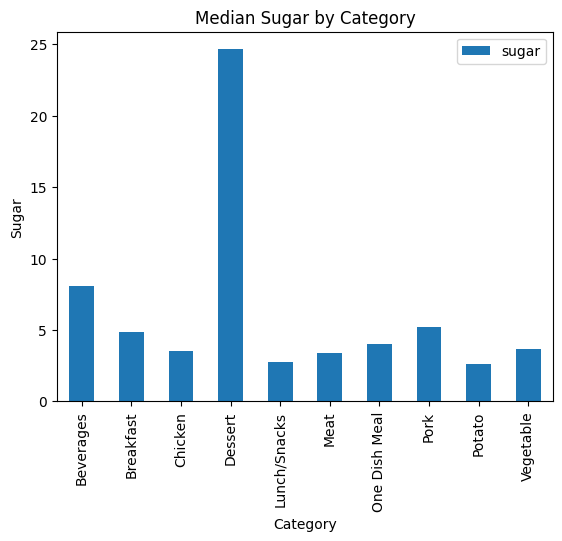

<Figure size 640x480 with 0 Axes>

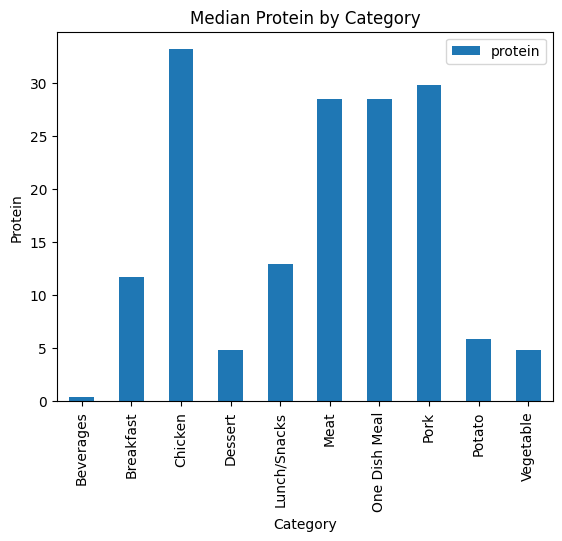

In [44]:
#group by category column and find median of each column
medians_of_cat=df.groupby('category')[numerical_columns].median().reset_index()

for column in numerical_columns:
    #create a bar plot
    plt.figure()
    medians_of_cat.plot(x='category', y=column, kind="bar")
    
    #set x and y axis labels
    plt.xlabel("Category")
    plt.ylabel(f"{column.capitalize()}")
    plt.title(f"Median {column.capitalize()} by Category")
#rotate x axis ticks
plt.xticks(rotation=90)
plt.show()

<Figure size 640x480 with 0 Axes>

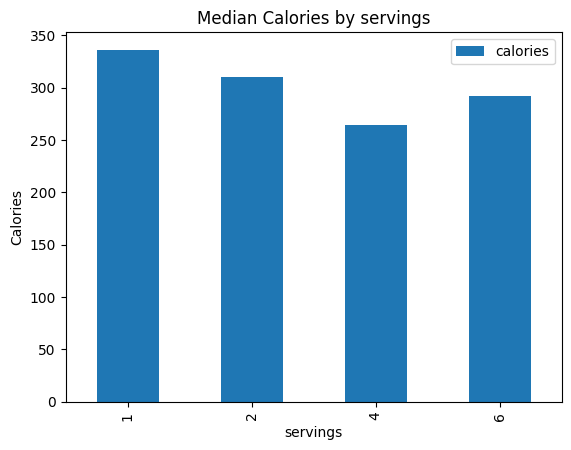

<Figure size 640x480 with 0 Axes>

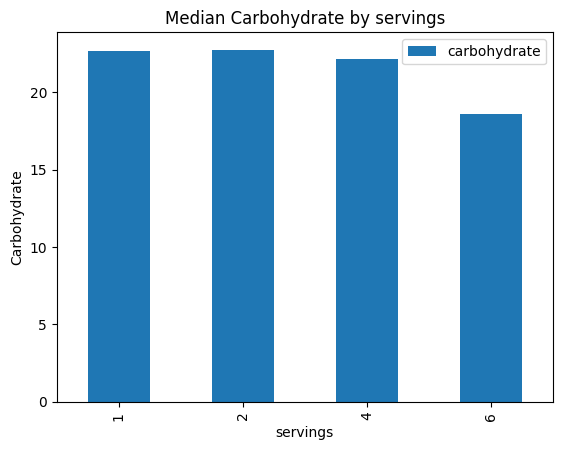

<Figure size 640x480 with 0 Axes>

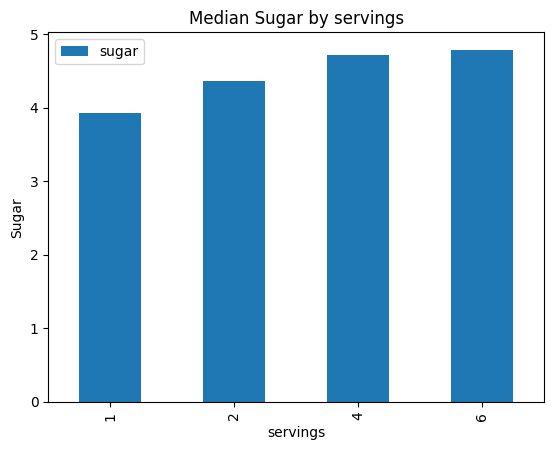

<Figure size 640x480 with 0 Axes>

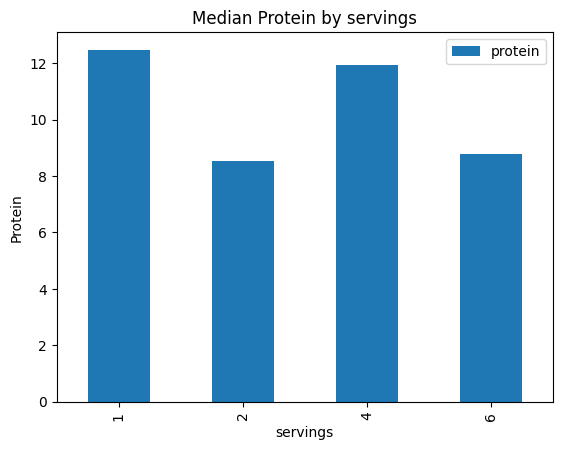

In [45]:
#group by servings column and find median of each column

medians_of_servings=df.groupby('servings')[numerical_columns].median().reset_index()

for column in numerical_columns:
    #create a bar plot
    plt.figure()
    medians_of_servings.plot(x='servings', y=column, kind="bar")
    
    #set x and y axis labels
    plt.xlabel("servings")
    plt.ylabel(f"{column.capitalize()}")
    plt.title(f"Median {column.capitalize()} by servings")

#rotate x axis ticks
plt.xticks(rotation=90)
plt.show()

high_traffic          0         1
category                         
Beverages      0.945652  0.054348
Breakfast      0.688679  0.311321
Chicken        0.576687  0.423313
Dessert        0.376623  0.623377
Lunch/Snacks   0.365854  0.634146
Meat           0.243243  0.756757
One Dish Meal  0.238806  0.761194
Pork           0.095890  0.904110
Potato         0.060241  0.939759
Vegetable      0.012821  0.987179


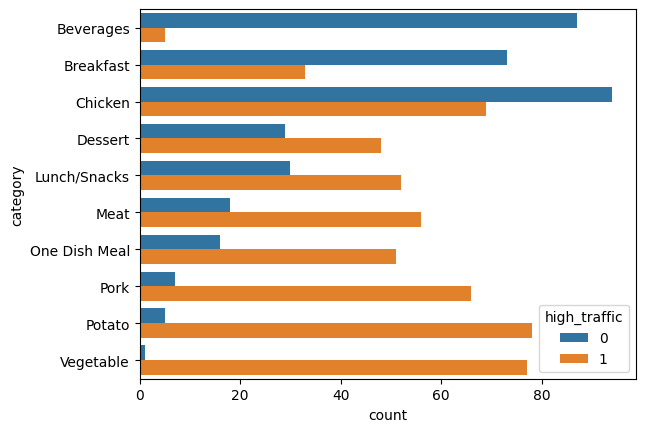

In [46]:
#group by high_trafic to show how categories is distributed
count_matrix=(df.groupby('high_traffic'))['category'].value_counts().rename("count").reset_index(level=[0,1]).pivot(columns='high_traffic',index='category',values='count')

#Normalization for percent of each category with  traffic rate
percent_matrix=count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(percent_matrix)
#Print the count matrix so see the distribution
sns.countplot(data=df,hue='high_traffic',y='category')
plt.show()

# Model Fitting & Evaluation
This problem is a classification problem for with 2 outputs, Either Hugh traffic appears as "1" in our data, or not with '0' value. We will use 2 models, logistic regression for baseline model, and it will be tested against RandomForest Classifier As the data has high standard deviation, and outliers shouldn't be removed as they will affect some of the categories, Yaojohnson transformation will be used as all the data is positive, also it will remove the skewness. Also, dummies will be made for category feature to male it numerical
As we target True positives, precision should be used as metric for evaluation. Percision counts the quality of a positive prediction made by the model. Precision refers to the number of true positives divided by the total number of positive predictions.

## prepare Data for Modelling
To enable modelling and prevent Bias, 'calories', 'carbohydrate', 'sugar', 'protein', servings and Cateogry should be used for training and testing. Some changes should be done as follows:
- YaoJohnson Transformation
- Changing category into numerical Values
- Data splitting into training (80%) and testing (20%)

In [47]:
#Feature preparation
transformed_data=df.copy()
#Dummies creation and concatation into one DF
dummies=pd.get_dummies(transformed_data['category'])
data_transformed_encoded=pd.concat([transformed_data,dummies],axis=1).drop('category',axis=1)


In [48]:
#Data Splitting
X=data_transformed_encoded.drop('high_traffic',axis=1)
y=data_transformed_encoded['high_traffic']
#Train_Test_splitting
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [49]:
#Power trasformation for Data
power=PowerTransformer(method='yeo-johnson',standardize=True)
power.fit(X_train[numerical_columns])
X_train[numerical_columns]=power.transform(X_train[numerical_columns])
X_test[numerical_columns]=power.transform(X_test[numerical_columns])

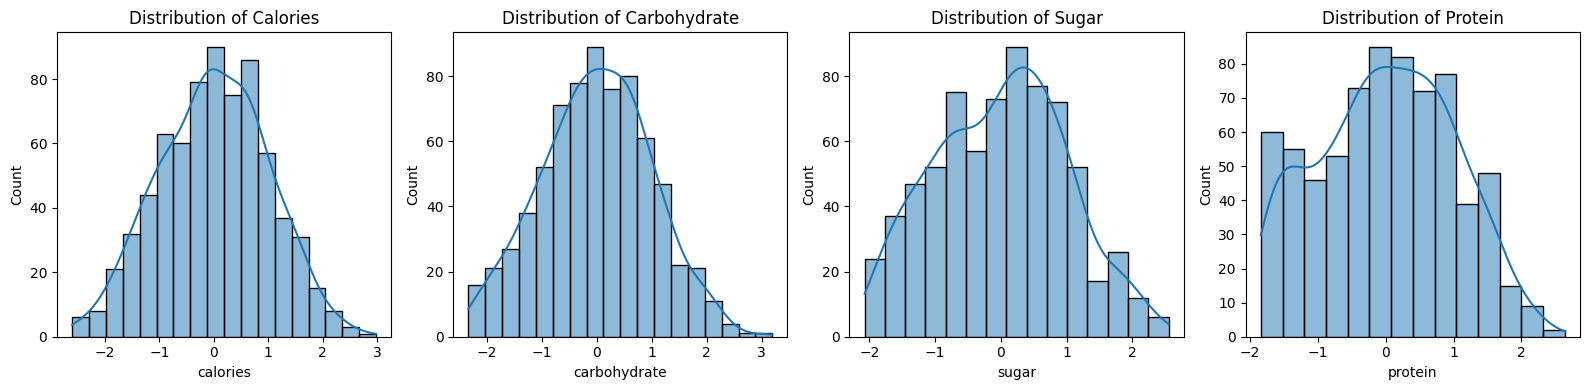

In [50]:
#Distribution graph for trasformed Data
plt.figure(figsize=(16, 4))

#iterating over each column and create a bar plot
for i, column in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i+1)
    sns.histplot(data=X_train, x=column, kde=True)
    plt.title(f"Distribution of {column.capitalize()}")

#adjust the spacing between subplots if needed
plt.tight_layout()
plt.show()

# Preparing Functions for concise coding

In [51]:
#Model fitting,prediction and scoring function
def clf_model(model,X_train,y_train,X_test,y_test):
    evaulation_metrics={}
    
    #Model_fitting
    model.fit(X_train,y_train)
    #Model_prediciton
    model_pred_train = model.predict(X_train)
    model_pred_test = model.predict(X_test)
    model_accuracy_train = accuracy_score(y_train, model_pred_train)
    model_precision_train = precision_score(y_train, model_pred_train)
    model_recall_train = recall_score(y_train, model_pred_train)
    model_f1_train = f1_score(y_train, model_pred_train)
    model_cm_train = confusion_matrix(y_train, model_pred_train)
   
    evaulation_metrics['train'] = [model_accuracy_train, model_precision_train, model_recall_train, model_f1_train, model_cm_train]

    #find evaluation parameters for test data
    model_accuracy_test = accuracy_score(y_test, model_pred_test)
    model_precision_test = precision_score(y_test, model_pred_test)
    model_recall_test = recall_score(y_test, model_pred_test)
    model_f1_test = f1_score(y_test, model_pred_test)
    model_cm_test = confusion_matrix(y_test, model_pred_test)
   
    evaulation_metrics['test'] = [model_accuracy_test, model_precision_test, model_recall_test, model_f1_test, model_cm_test]

    return evaulation_metrics
    

In [52]:
#Printing Metrices for train and test function
def print_metrics(evaluation_metrics):
    print("  Accuracy:", evaluation_metrics[0])
    print("  Precision:", evaluation_metrics[1])
    print("  Recall:", evaluation_metrics[2])
    print("  F1-Score:", evaluation_metrics[3])
    print("  Confusion Matrix:")
    print(evaluation_metrics[4])

### Finding best Parameters for RandomForest Classifier Using GridSearchCV

In [53]:
#GridSearch Cross Validation For getting Best parameters for Random Forest
#crearing classifier
rfc=RandomForestClassifier(random_state=7,n_jobs=-1)
param_grid={'n_estimators': [50,75,100],\
            'max_depth': [5,7, 9]}
#initiation of CV
GS=GridSearchCV(rfc, param_grid,scoring='accuracy')
GS.fit(X_train,y_train)
best_params=GS.best_params_
print('Best hyperparameters are: '+str(GS.best_params_))

Best hyperparameters are: {'max_depth': 7, 'n_estimators': 100}


### Logistic Regression

In [54]:
#Baseline model Logistic Regression
log=LogisticRegression()
logreg_score=clf_model(log, X_train, y_train, X_test, y_test)
#Logistic Regression Scores
#Logistic Regression Scores
print("Logistic Regression Train:")
print_metrics(logreg_score['train'])

print("Logistic Regression Test:")
print_metrics(logreg_score['test'])

Logistic Regression Train:
  Accuracy: 0.7625698324022346
  Precision: 0.8
  Recall: 0.7962085308056872
  F1-Score: 0.7980997624703088
  Confusion Matrix:
[[210  84]
 [ 86 336]]
Logistic Regression Test:
  Accuracy: 0.7653631284916201
  Precision: 0.808695652173913
  Recall: 0.8230088495575221
  F1-Score: 0.8157894736842104
  Confusion Matrix:
[[44 22]
 [20 93]]


### RandomForest Classifier

In [55]:
#Model compared against Baseline: RandomForestClassifier
RF=RandomForestClassifier(max_depth=best_params['max_depth'],n_estimators=best_params['n_estimators']\
                          ,random_state=7,n_jobs=-1)
RF_score=clf_model(RF, X_train, y_train, X_test, y_test)
#Random Forest Scores
print("Random Forest Train:")
print_metrics(RF_score['train'])

print("Random Forest Test:")
print_metrics(RF_score['test'])

Random Forest Train:
  Accuracy: 0.8603351955307262
  Precision: 0.8368200836820083
  Recall: 0.9478672985781991
  F1-Score: 0.8888888888888888
  Confusion Matrix:
[[216  78]
 [ 22 400]]
Random Forest Test:
  Accuracy: 0.770949720670391
  Precision: 0.8
  Recall: 0.8495575221238938
  F1-Score: 0.8240343347639485
  Confusion Matrix:
[[42 24]
 [17 96]]


## Results
### LogReg Scores
The Baseline model shows barely no difference between the scores of Training data and Test data, but the accuracy is relativily low, this implies that the data is not enough to produce a good ML model. However, on aligment with buisness problem which is checking for Right predicted High Traffic, we look to precision, Which is 80% for training, and 80.8% for test. For training and testing, that aligns with our goal for predicting 80% of high traffic right.
 
 ### RF score and comparing
Upon comparing RF to LogReg, Random Forest Shows Higher accuracy for training which is 86.0% comparing to 76.25% for log reg, but upon comparing the Test accuracy, it was found that random forest is a bit higher with accuracy 77.1% compraing to 76.5%. The training Accuracy of RF was high, but the testing was so much lower implying some overfitting. For our buisness problem, RF training precision was 83.68% compared to 80% of Logreg, and in testing it was 80% percent comparing to 80.8% for LogReg.


## Evaluate by Business Criteria
It shows that Both RF and Logreg could work on our buisness model, but to ensure it, we need to Use Key Performance Indicator which is percision for our case. As we need 80% of High Traffic is right predicted, our KPI should be the ration between True postitives (Which is High predicited rightly) and False Positives (WHich is recipes falsly predicted as High), This ration should be higher Than 4.

In [56]:
# KPI calculation
def calculate_kpi(model_metrics, model_name):
    kpi_train = model_metrics['train'][4]
    kpi_test = model_metrics['test'][4]
    print(f"High Traffic Conversion Rate for {model_name} train: ", kpi_train[1][1]/(kpi_train[0][1]))
    print(f"High Traffic Conversion Rate for {model_name} test: ", kpi_test[1][1]/(kpi_test[0][1]))

In [57]:
#KPI calculation for Logistic Regression
calculate_kpi(logreg_score, "Logistic Regresssion")
#KPI for Random Forest
calculate_kpi(RF_score, "Random Forest")

High Traffic Conversion Rate for Logistic Regresssion train:  4.0
High Traffic Conversion Rate for Logistic Regresssion test:  4.2272727272727275
High Traffic Conversion Rate for Random Forest train:  5.128205128205129
High Traffic Conversion Rate for Random Forest test:  4.0


KPI calucluations Showed that LogReg train conversion rate is 4.0, and test 4.23 which aligns with our buisness goal to get 80% of the High Traffic recpies right. Random Forest showed higher converstion rate on training dataset but lower on testing data set, but still 4.0 which is good for the buisness model. Finally, both our baseline Linear Regression and Compared Model Random Forest passed the criterea for Buisness problem on both testing and training data.

# Recommendation
To help the website increase the traffic, we can implment Random Forest Classifier to predict if the recipe will get High traffic or not to be displayed in the homepage. By implmenting the Model, we will be able to predict more Than 80% of High traffic recipes. This will help choosing the right recipes and therefore increasing the traffic.

For Evaluation, A/B testing could be used to test our predicitons and evalaute the traffic of the website on Using recipes according to favourites of the website owner as previous, against using recipes prediceted by our model.

To implment and Improve model, i may consider the following:
- Collecting more data, as grouping cateogries that visitors choose, and timestamp of visits of each category
- Looking for best way to implment the model in terms of performance and cost. In my PoV, best way that the model implemented directly to the website and update by itself based on teh visits, but that may need some work. More simplier way is to change the recipes every day manually based on Visits and prediciton of new recipes.  

### Conculsion
Finally, in our project, our aim was to classify sample (recipes) into High traffic or Low traffic groups. We implemnted 2 models and compared between them, our baseline model sucessfully passed the minimum requirments in both training and testing score, and the other model was Random Forest Classifer, which passed too with higher score on Training data, but a bit lower score on testing score. As prediciton of a low-traffic into High traffic could lead to loss in buisness, we defined a new Key Performance indicator(KPI) which is High Traffic converstion Rate which could be used easily to compare between models. It was derived from our True positive (Rightly identified as High traffic) and False Positive (Wrongly identified as High traffic). 
    We also did exploratory data analysis that could help us understand the data more and derive insights, On analysis we found that recipes with 'Pork' , 'Vegetables', and 'Potato' generates high traffic, and on other side beverages produce low traffic.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation